## ocean states on cubed sphere
This is an example of how to handle the model output from cubed sphere grid.

In [2]:
import numpy as np
import cubedsphere as cs

import matplotlib.pyplot as plt

In [3]:
# This is the directory where you run the model
outdir_ascii = "/Users/hajsong/MITgcm/verification/global_ocean.cs32x15/run"

In [4]:
ds_ascii, grid = cs.open_ascii_dataset(outdir_ascii, iters=[90000], 
                                       prefix = ["Ttave","Stave","uVeltave","vVeltave"])
# regrid dataset
regrid = cs.Regridder(ds_ascii, grid)
ds = regrid()

could not rename, got error: cannot rename 'T' because it is not a variable or dimension in this dataset
time needed to build regridder: 0.38971972465515137
Regridder will use conservative method


In [11]:
hfac_ascii, _ = cs.open_ascii_dataset(outdir_ascii, 
                                       prefix = ["hFacC","hFacW","hFacS"])

could not rename, got error: cannot rename 'time' because it is not a variable or dimension in this dataset


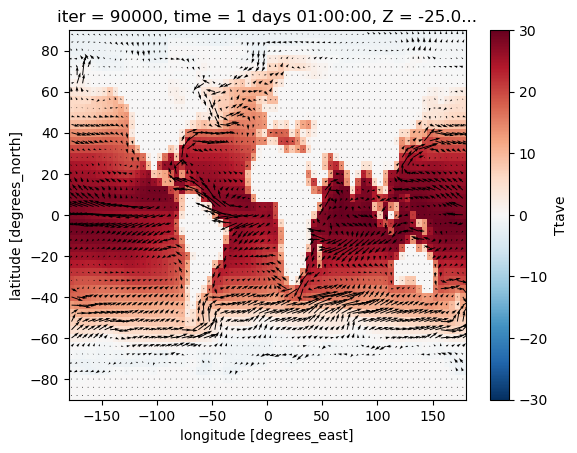

In [5]:
plt.figure()
# Select horizontal slice at latest time:
data = ds.isel(time=-1,Z=0)
# Plot temperature:
data.Ttave.plot()
# Overplot winds:
cs.overplot_wind(ds, data.uVeltave.values, data.vVeltave.values)
plt.show()

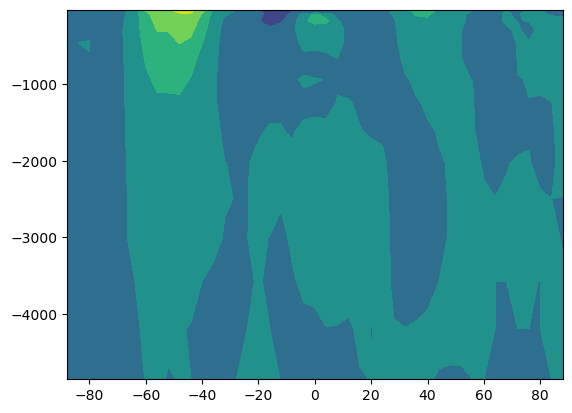

In [7]:
plt.figure()
zmean = ds.uVeltave.isel(time=-1).mean(dim='lon')
plt.contourf(ds.lat, ds.Z, zmean)
plt.show()